# Lab session for Week 3 (02/01 -- 02/05)
 - Pandas
 - simple statistics
 - plot
 - sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.linear_model as skl_lm

### In notebook enviorment, we can still use command to check if the interested files are in place. Preced your command (e.g. ls) with the symbol % will do.

In [3]:
%ls *.csv

Advertising.csv* Carseats.csv*    Khan_xtrain.csv* Smarket.csv*
Boston.csv*      Hitters.csv*     Khan_ytest.csv*
Caravan.csv*     Khan_xtest.csv*  Khan_ytrain.csv*


In [4]:
%pwd

'/Users/felix/Teaching/2021_spring_statsML/Py'

### If the data set is contained in a csv file, one can use method .read_csv to import the data

In [5]:
data = pd.read_csv('Advertising.csv')

In [6]:
data.head(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


### The method "loc" and "iloc" are very useful in accessing specific rows and columns. See the following examples.

In [7]:
data.iloc[20:30]

,Unnamed: 0,TV,Radio,Newspaper,Sales
20,21,218.4,27.7,53.4,18.0
21,22,237.4,5.1,23.5,12.5
22,23,13.2,15.9,49.6,5.6
23,24,228.3,16.9,26.2,15.5
24,25,62.3,12.6,18.3,9.7
25,26,262.9,3.5,19.5,12.0
26,27,142.9,29.3,12.6,15.0
27,28,240.1,16.7,22.9,15.9
28,29,248.8,27.1,22.9,18.9
29,30,70.6,16.0,40.8,10.5


In [8]:
data.iloc[20:30]['TV']

20    218.4
21    237.4
22     13.2
23    228.3
24     62.3
25    262.9
26    142.9
27    240.1
28    248.8
29     70.6
Name: TV, dtype: float64

In [11]:
data.iloc[50:60]['Sales']

50    11.4
51    10.7
52    22.6
53    21.2
54    20.2
55    23.7
56     5.5
57    13.2
58    23.8
59    18.4
Name: Sales, dtype: float64

In [13]:
data.loc[5:12,['TV','Sales']]

,TV,Sales
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,10.6
10,66.1,8.6
11,214.7,17.4
12,23.8,9.2


In [17]:
data.iloc[10:20,1:5]

,TV,Radio,Newspaper,Sales
10,66.1,5.8,24.2,8.6
11,214.7,24.0,4.0,17.4
12,23.8,35.1,65.9,9.2
13,97.5,7.6,7.2,9.7
14,204.1,32.9,46.0,19.0
15,195.4,47.7,52.9,22.4
16,67.8,36.6,114.0,12.5
17,281.4,39.6,55.8,24.4
18,69.2,20.5,18.3,11.3
19,147.3,23.9,19.1,14.6


In [18]:
data.iloc[5:12,[1,4]]

,TV,Sales
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,10.6
10,66.1,8.6
11,214.7,17.4


### Not only can we access the rows and columns of interest, we can also do simple statistics on the selected data. 

In [30]:
tv_value_mean = data.iloc[:,[1]].mean()

In [31]:
print(tv_value_mean)

TV    147.0425
dtype: float64


In [32]:
type(tv_value_mean)

pandas.core.series.Series

In [34]:
data.iloc[:,[1]].sum()

TV    29408.5
dtype: float64

In [33]:
data.iloc[:,[4]].mean()

Sales    14.0225
dtype: float64

In [36]:
data.loc[:100,['TV']].mean()

TV    147.909901
dtype: float64

In [37]:
data.loc[:,['TV']].max()

TV    296.4
dtype: float64

In [38]:
data.loc[:,['Sales']].min()

Sales    1.6
dtype: float64

## Before we start our linear regression model, we need to extract the data set (X,y)

In [40]:
x_tv = data.loc[:,['TV']].values

In [41]:
type(x_tv)

numpy.ndarray

In [42]:
x_tv.shape

(200, 1)

In [43]:
y_sales = data.loc[:,['Sales']].values

In [44]:
y_sales.shape

(200, 1)

## Once the data set is ready, we want to split the data into two groups. One for training, the other for test. We will do a 80/20 random split.

In [76]:
import random

idx = random.sample(range(200),160)

In [77]:
x_train = x_tv[idx]
y_train = y_sales[idx]

In [87]:
# Here I use list comprehension to generate the test data that do not appear in the training set

In [78]:
x_test = [x_tv[i] for i in range(200) if i not in idx]

len(x_test)

40

In [79]:
y_test = [y_sales[i] for i in range(200) if i not in idx]

len(y_test)

40

# Below is how a linear regression model is initialized and how the training is done with .fit method

In [80]:
regr = skl_lm.LinearRegression()

regr.fit(x_train,y_train)

LinearRegression()

## After the training is completed, we can access the model parameters. And we can plot the model along with the data using matlibplot.

In [81]:
regr.intercept_, regr.coef_

(array([6.79023642]), array([[0.0497927]]))

In [82]:
def f(x):
    return regr.intercept_+regr.coef_*x

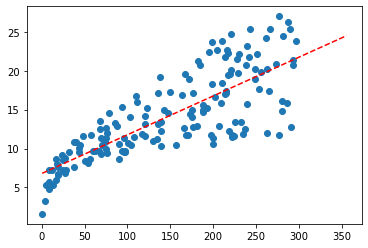

In [83]:
x_plot = np.linspace(0.8*min(x_train), 1.2*max(x_train), 200)

plt.scatter(x_train,y_train)
plt.plot(x_plot,f(x_plot),'r--')

# Now it is time to check the model's performance. We need to do
 - predicting the ouput for x_train, i.e. we get y_train_pred = f(x_train)
 - training error, i.e. the mean-squared-error between the truth, y_train, and the prediction, y_train_pred
 - test error, comparing the truth, y_test, and the prediction y_test_pred = f(x_test)
 - take a moment to think about the meaning of training error and test error.

In [84]:
from sklearn.metrics import mean_squared_error

y_train_pred = regr.predict(x_train)

mean_squared_error(y_train,y_train_pred)

10.838451416591775

In [85]:
y_test_pred = regr.predict(x_test)


len(y_test), len(x_test)


(40, 40)

In [86]:
mean_squared_error(y_test,y_test_pred)

9.436049214325424